In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#manipulator param
j1j2 = 19;
j2j5 = 29;
j5j7 = 42;
j2j4 = 23;
j3j5 = 23;
j5j6 = 22;
fwd_link_length = j5j7;
rear_link_length = j2j5;

fwd_piston_max = 43; fwd_piston_min = 30;
rear_piston_max = 37; rear_piston_min = 28;
SAMPLES = 50;

fwd_piston_length = np.linspace(fwd_piston_min,fwd_piston_max,SAMPLES);
rear_piston_length = np.linspace(rear_piston_min,rear_piston_max,SAMPLES);
piston_length = np.array([]);
for i in range(len(fwd_piston_length)):
    for j in range(len(rear_piston_length)):
        piston_length = np.append(piston_length,[fwd_piston_length[i],rear_piston_length[j]], axis = 0);
piston_length = piston_length.reshape((SAMPLES**2,2));

In [3]:
def getJointAngles(piston_length):
    front_piston = piston_length[0:len(piston_length),0];
    rear_piston = piston_length[0:len(piston_length),1];
    return [(np.pi-np.arccos((j3j5**2 + j5j6**2 - front_piston**2)/(2*j3j5*j5j6))),
           -(np.pi-np.arccos((j1j2**2 + j2j4**2 - rear_piston**2)/(2*j1j2*j2j4)))];

In [4]:
def direct_kinematics(fwd_angle, rear_angle, fwd_link_length, rear_link_length):
    return [rear_link_length*np.cos(rear_angle)+fwd_link_length*np.cos(fwd_angle+rear_angle), rear_link_length*np.sin(rear_angle)+fwd_link_length*np.sin(fwd_angle+rear_angle)]
    #return np.array([[ np.cos(fwd_angle+rear_angle), -np.sin(fwd_angle+rear_angle), 0, rear_link_length*np.cos(rear_angle)+fwd_link_length*np.cos(fwd_angle+rear_angle)],
    #                 [ np.sin(fwd_angle+rear_angle),  np.cos(fwd_angle+rear_angle), 0, rear_link_length*np.sin(rear_angle)+fwd_link_length*np.sin(fwd_angle+rear_angle)],
    #                 [ 0                           ,  0                           , 1, 0  ],
    #                 [ 0                           ,  0                           , 0, 1  ]]);

In [5]:
[fwd_angle, rear_angle] = getJointAngles(piston_length);

In [6]:
[x,y]=direct_kinematics(fwd_angle,rear_angle,fwd_link_length,rear_link_length);

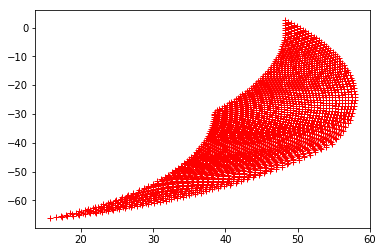

In [7]:
plt.plot(x,y,'r+');

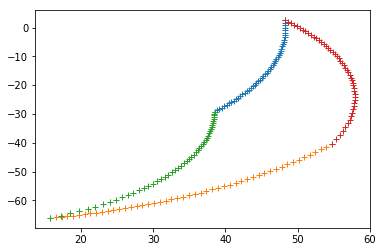

In [8]:
X1 = [];
Y1 = [];

for i in range(0,2500,50):
    X1.append(x[i]);
    Y1.append(y[i]);
X2 = [];
Y2 =[];
for i in range(49,2500,50):
    X2.append(x[i]);
    Y2.append(y[i]);
plt.plot(x[0:50],y[0:50],'+',x[2500-50:2500],y[2500-50:2500],'+',X1,Y1,'+',X2,Y2,'+');

In [9]:
from scipy.optimize import curve_fit

In [10]:
def func(x,a,b,c,d):
    return a*x**3+b*x**2+c*x**1+d;
def red_func(x,a,b,c,d):
    return (a*x**3+b*x**2+c*x**1+d);
popt_blue, pcov_blue = curve_fit(func, x[0:50], y[0:50])
popt_yellow, pcov_yellow = curve_fit(func,x[2500-50:2500],y[2500-50:2500])
popt_green, pcov_green = curve_fit(func,X1,Y1)
popt_red, pcov_red = curve_fit(red_func,Y2,X2)

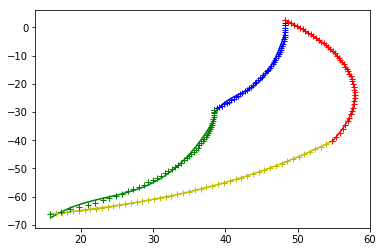

In [11]:
plt.plot(x[0:50], func(x[0:50], *popt_blue), 'b-', 
         x[2500-50:2500], func(x[2500-50:2500], *popt_yellow), 'y-', 
         np.array(X1), func(np.array(X1), *popt_green), 'g-',
         red_func(np.array(Y2), *popt_red), np.array(Y2), 'r-',
         x[0:50],y[0:50],'b+',
         x[2500-50:2500],y[2500-50:2500],'y+',
         X1,Y1,'g+',
         X2,Y2,'r+');

/srv/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:3253: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


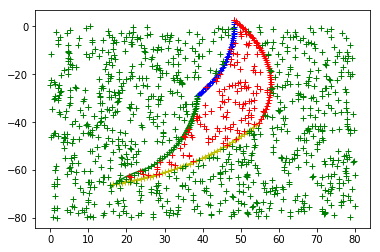

In [25]:
plt.plot(x[0:50], func(x[0:50], *popt_blue), 'b-', 
         x[2500-50:2500], func(x[2500-50:2500], *popt_yellow), 'y-', 
         np.array(X1), func(np.array(X1), *popt_green), 'g-',
         red_func(np.array(Y2), *popt_red), np.array(Y2), 'r-',
         x[0:50],y[0:50],'b+',
         x[2500-50:2500],y[2500-50:2500],'y+',
         X1,Y1,'g+',
         X2,Y2,'r+',hold='on');
x_in = np.random.rand(1000,1)*80;
y_in = -np.random.rand(1000,1)*80;
for k in range(len(x_in)):
    if( (x_in[k] - func(y_in[k], *popt_red))  < 0 and
        (y_in[k] - func(x_in[k], *popt_green))  < 0 and
        (y_in[k] - func(x_in[k], *popt_yellow))  > 0):
        if(x_in[k] > x[0]):
            if((y_in[k] - func(x_in[k], *popt_blue))  < 0):
                plt.plot(x_in[k],y_in[k],'r+',hold='on');
            else:
                plt.plot(x_in[k],y_in[k],'g+',hold='on');
        else:
            plt.plot(x_in[k],y_in[k],'r+',hold='on');
    else:
        plt.plot(x_in[k],y_in[k],'g+',hold='on');

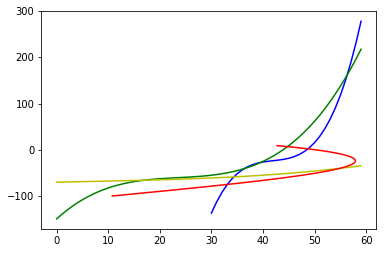

In [21]:
plt.plot(range(30,60),func(np.array(range(30,60)), *popt_blue),'b',
         range(0,60),func(np.array(range(0,60)), *popt_green),'g',
         range(0,60),func(np.array(range(0,60)), *popt_yellow),'y',
       red_func(np.array(range(-100,10)), *popt_red), range(-100,10),'r');

In [26]:
x[0]

38.48086680197223